### Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import matplotlib.pyplot as plt

### US Health Insurance Dataset

In [2]:
# load dataset
df = pd.read_csv("data/ushealth.csv")

# Create x & y
x = df.drop("charges", axis=1)
y = df["charges"]

# Build our train and test sets (use random state to ensure same split as before for hyperparams experiment)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Identify the categorical and numeric columns
numeric_features = ["age", "bmi", "children"]
categorical_features = ["sex", "smoker", "region"]
ct = make_column_transformer((MinMaxScaler(), numeric_features),
                             (OneHotEncoder(handle_unknown='ignore'), categorical_features))

# transform the data using transformers
x_train_transformed = ct.fit_transform(x_train)
x_test_transformed = ct.transform(x_test)

In [3]:
ct

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])

In [4]:
x_train.shape, x_train_transformed.shape

((1003, 6), (1003, 11))

### Model Architecture

In [5]:
# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 11, 100, 1 units)
model = tf.keras.Sequential([
        tf.keras.layers.Dense(11, activation="relu", input_shape = x_train_transformed.shape[1:]),
        tf.keras.layers.Dense(100, activation="relu"),
        tf.keras.layers.Dense(1)])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model for 100 epochs 
history = model.fit(x_train_transformed, y_train, epochs=100) 

Epoch 1/100
32/32 [==============================] - 0s 902us/step - loss: 13266.3076 - mae: 13266.3076
Epoch 2/100
32/32 [==============================] - 0s 635us/step - loss: 13262.9648 - mae: 13262.9648
Epoch 3/100
32/32 [==============================] - 0s 780us/step - loss: 13255.2637 - mae: 13255.2637
Epoch 4/100
32/32 [==============================] - 0s 879us/step - loss: 13239.1543 - mae: 13239.1543
Epoch 5/100
32/32 [==============================] - 0s 843us/step - loss: 13209.3135 - mae: 13209.3135
Epoch 6/100
32/32 [==============================] - 0s 747us/step - loss: 13159.8525 - mae: 13159.8525
Epoch 7/100
32/32 [==============================] - 0s 640us/step - loss: 13084.9434 - mae: 13084.9434
Epoch 8/100
32/32 [==============================] - 0s 677us/step - loss: 12979.4072 - mae: 12979.4072
Epoch 9/100
32/32 [==============================] - 0s 754us/step - loss: 12837.8525 - mae: 12837.8525
Epoch 10/100
32/32 [==============================] - 0s 886us/s

32/32 [==============================] - 0s 828us/step - loss: 5206.3940 - mae: 5206.3940
Epoch 81/100
32/32 [==============================] - 0s 762us/step - loss: 5103.9858 - mae: 5103.9858
Epoch 82/100
32/32 [==============================] - 0s 728us/step - loss: 5002.1094 - mae: 5002.1094
Epoch 83/100
32/32 [==============================] - 0s 641us/step - loss: 4896.4619 - mae: 4896.4619
Epoch 84/100
32/32 [==============================] - 0s 844us/step - loss: 4792.7446 - mae: 4792.7446
Epoch 85/100
32/32 [==============================] - 0s 785us/step - loss: 4681.3081 - mae: 4681.3081
Epoch 86/100
32/32 [==============================] - 0s 768us/step - loss: 4574.1294 - mae: 4574.1294
Epoch 87/100
32/32 [==============================] - 0s 523us/step - loss: 4469.7432 - mae: 4469.7432
Epoch 88/100
32/32 [==============================] - 0s 654us/step - loss: 4369.9507 - mae: 4369.9507
Epoch 89/100
32/32 [==============================] - 0s 978us/step - loss: 4280.3462 

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 100)               1200      
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 1,433
Trainable params: 1,433
Non-trainable params: 0
_________________________________________________________________


In [7]:
y_predicted = model.predict(x_test_transformed)
y_predicted

11/11 [==============================] - 0s 858us/step


array([[ 9132.859 ],
       [ 5983.2437],
       [30122.865 ],
       [ 8903.562 ],
       [19058.352 ],
       [ 5936.4956],
       [ 1592.8429],
       [12857.895 ],
       [ 3720.041 ],
       [ 9816.191 ],
       [22126.623 ],
       [ 7593.4736],
       [ 4273.2983],
       [27082.91  ],
       [29220.35  ],
       [26721.518 ],
       [10345.427 ],
       [26612.436 ],
       [ 8315.449 ],
       [25013.35  ],
       [ 4142.186 ],
       [ 7882.1387],
       [ 1374.3971],
       [ 3654.7412],
       [10452.979 ],
       [11001.645 ],
       [11816.529 ],
       [ 4996.361 ],
       [ 9707.925 ],
       [ 1373.4628],
       [ 8162.9316],
       [11206.194 ],
       [ 2355.2664],
       [ 5079.0425],
       [ 3190.127 ],
       [ 8823.909 ],
       [ 2204.1133],
       [ 7750.2173],
       [27425.89  ],
       [23419.934 ],
       [ 3401.7957],
       [ 2788.3525],
       [11279.802 ],
       [10869.878 ],
       [ 5593.1465],
       [11066.979 ],
       [ 3342.8218],
       [ 3808

In [8]:
# Check the tensor shapes
y_test.shape, y_predicted.shape

((335,), (335, 1))

In [9]:
# Shape after squeeze()
y_predicted.squeeze().shape

(335,)

In [10]:
# Calcuate the MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=y_predicted.squeeze()) # use squeeze() to make same shape
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3734.8284>

In [11]:
# Calculate the MSE
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=y_predicted.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=53506532.0>

In [12]:
mae, mse

(<tf.Tensor: shape=(), dtype=float32, numpy=3734.8284>,
 <tf.Tensor: shape=(), dtype=float32, numpy=53506532.0>)

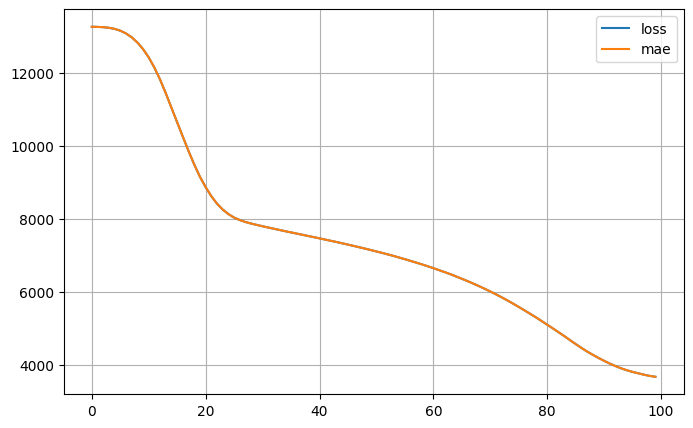

In [13]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca() 
plt.show()

Text(0.5, 1.0, 'MAE vs Epochs')

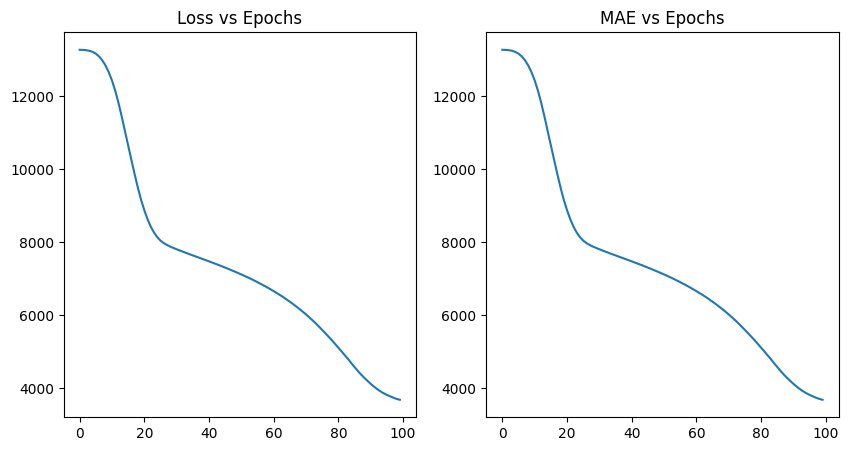

In [14]:
loss = history.history['loss']
mae = history.history['mae']
epochs = list(range(len(loss)))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

axes[0].plot(epochs, loss)
axes[0].set_title('Loss vs Epochs')

axes[1].plot(epochs, mae)
axes[1].set_title('MAE vs Epochs')

In [15]:
history.history

{'loss': [13266.3076171875,
  13262.96484375,
  13255.263671875,
  13239.154296875,
  13209.3134765625,
  13159.8525390625,
  13084.943359375,
  12979.4072265625,
  12837.8525390625,
  12655.5166015625,
  12427.1201171875,
  12148.1640625,
  11818.3369140625,
  11444.53125,
  11046.041015625,
  10647.734375,
  10252.6689453125,
  9861.1455078125,
  9492.0478515625,
  9155.703125,
  8871.7724609375,
  8624.9609375,
  8419.439453125,
  8258.7119140625,
  8134.724609375,
  8038.736328125,
  7971.216796875,
  7918.13134765625,
  7874.5927734375,
  7837.88525390625,
  7801.01611328125,
  7766.87890625,
  7732.76220703125,
  7699.037109375,
  7665.10791015625,
  7633.14599609375,
  7600.53173828125,
  7567.91943359375,
  7535.259765625,
  7503.423828125,
  7470.08642578125,
  7436.10107421875,
  7402.720703125,
  7370.01806640625,
  7334.19775390625,
  7299.0517578125,
  7262.70458984375,
  7225.20556640625,
  7188.67724609375,
  7150.0234375,
  7110.98486328125,
  7071.48388671875,
  7030.1

## Predicting a single Value

In [22]:
x_test

,age,sex,bmi,children,smoker,region
764,45,female,25.175,2,no,northeast
887,36,female,30.020,0,no,northwest
890,64,female,26.885,0,yes,northwest
1293,46,male,25.745,3,no,northwest
259,19,male,31.920,0,yes,northwest
...,...,...,...,...,...,...
342,60,female,27.550,0,no,northeast
308,58,male,34.865,0,no,northeast
1128,34,male,32.800,1,no,southwest
503,19,male,30.250,0,yes,southeast


In [23]:
x_test.iloc[2]

age                64
sex            female
bmi            26.885
children            0
smoker            yes
region      northwest
Name: 890, dtype: object

In [20]:
pd.DataFrame(x_test.iloc[2])

,890
age,64
sex,female
bmi,26.885
children,0
smoker,yes
region,northwest


In [25]:
x_test.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

In [24]:
aa = pd.DataFrame(x_test.iloc[2].values.reshape(1,6), columns=x_test.columns)
aa

,age,sex,bmi,children,smoker,region
0,64,female,26.885,0,yes,northwest


In [28]:
ct.transform(aa)

array([[1.        , 0.29391983, 0.        , 1.        , 0.        ,
        0.        , 1.        , 0.        , 1.        , 0.        ,
        0.        ]])

In [30]:
model.predict(ct.transform(aa))

1/1 [==============================] - 0s 16ms/step


array([[30122.87]], dtype=float32)